# 数据预处理

## 原始数据处理

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cross_validation import train_test_split
from scipy import interpolate

### data_x+_空载

In [50]:
data_none=pd.read_csv("data_x+_空载.txt",nrows =100)
data_none=pd.DataFrame(data_none)

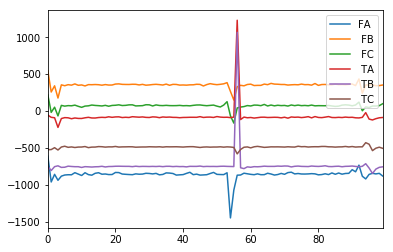

(100, 6)

In [51]:
data_none.drop(data_none.columns[6], axis=1,inplace=True)
data_none.plot()
plt.show()
data_none.shape

### data_x+向上_中心

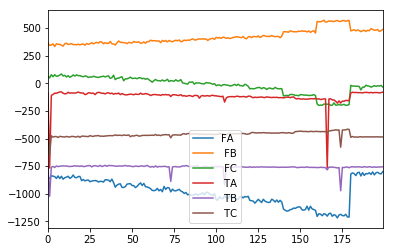

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
FA     200 non-null float64
 FB    200 non-null float64
 FC    200 non-null float64
 TA    200 non-null float64
 TB    200 non-null float64
 TC    200 non-null float64
dtypes: float64(6)
memory usage: 9.5 KB


In [52]:
data_x1=pd.read_csv("data_x+向上_中心.txt")
data_x1=pd.DataFrame(data_x1)
data_x1.drop(data_x1.columns[6], axis=1,inplace=True)
data_x1.plot()
plt.show()
data_x1.shape
data_x1.info()

### data_x+向上_y-

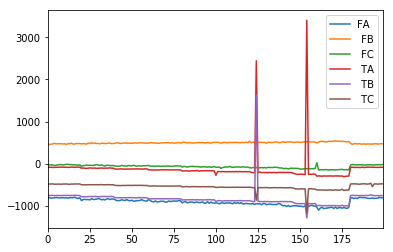

(200, 6)

In [53]:
data_y2=pd.read_csv("data_x+向上_y-.txt") 
data_y2.drop(data_y2.columns[6], axis=1,inplace=True)
data_y2.plot()
plt.show()
data_y2.shape

### data_x+向上_y+

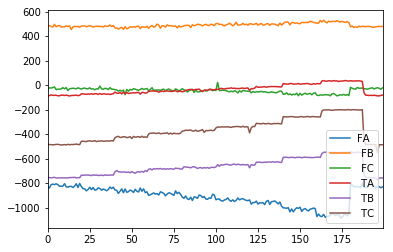

(200, 6)

In [54]:
data_y1=pd.read_csv("data_x+向上_y+.txt")
data_y1.drop(data_y1.columns[6], axis=1,inplace=True)
data_y1.plot()
plt.show()
data_y1.shape

### data_x+向上_x-y+30度

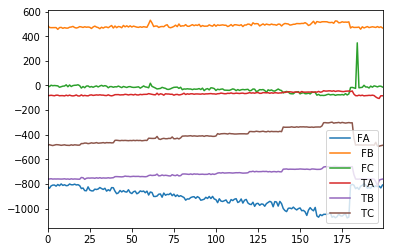

-84.042549000121696

In [55]:
data_xy=pd.read_csv("data_x+向上_x-y+30度.txt")
data_xy.drop(data_xy.columns[6], axis=1,inplace=True)
data_xy.plot()
plt.show()

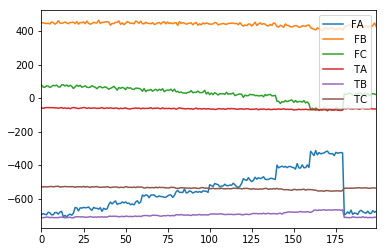

In [111]:
data_y3=pd.read_csv("data_y-向上_中心.txt")
data_y3.drop(data_y3.columns[6], axis=1,inplace=True)
data_y3.plot()
plt.show()

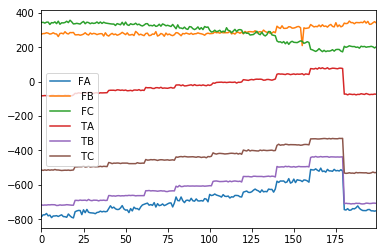

In [112]:
data_y4=pd.read_csv("data_y-向上_x+外.txt")
data_y4.drop(data_y4.columns[6], axis=1,inplace=True)
data_y4.plot()
plt.show()

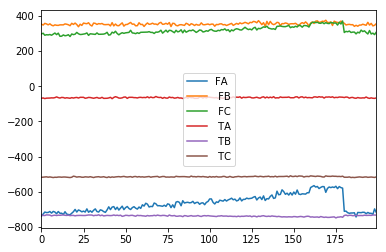

In [113]:
data_z1=pd.read_csv("data_z+向上_中心 .txt")
data_z1.drop(data_z1.columns[6], axis=1,inplace=True)
data_z1.plot()
plt.show()

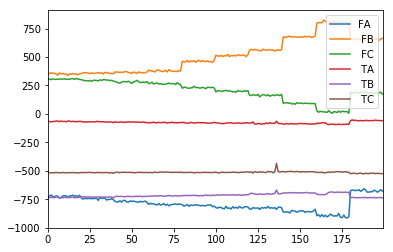

In [114]:
data_z2=pd.read_csv("data_z+向上_x+ .txt")
data_z2.drop(data_z2.columns[6], axis=1,inplace=True)
data_z2.plot()
plt.show()

### 去噪点

In [115]:
def drop_noisy(df):
    df_copy = df.copy()
    for i in range(int(df.shape[0]/20-1)):
        df_describe = df_copy[i*20:(i+1)*20].describe()
        for column in df.columns:
            mean = df_describe.loc['mean',column]
            std = df_describe.loc['std',column]
            minvalue = mean - 2*std
            maxvalue = mean + 2*std
            df_copy[i*20:(i+1)*20] = df_copy[i*20:(i+1)*20][df_copy[column] >= minvalue]
            df_copy[i*20:(i+1)*20] = df_copy[i*20:(i+1)*20][df_copy[column] <= maxvalue]    
    return df_copy

### 求平均

In [116]:
def my_mean(df):
    df_copy=df.copy()
    df_single=[[0] * 6] * (int(df.shape[0]/20))
    df_single=pd.DataFrame(df_single)
    df_single.columns=df.columns
    for i in range(int(df.shape[0]/20)): 
        df_describe = df_copy[i*20:(i+1)*20]
        for j in range(6):
            df_single.iloc[i,j]=df_describe.iloc[:, j].mean()
    zero=[[0] * 6] * 10
    for m in range(6):
        col_num=df_single.shape[0]
        diff=(df_single.iloc[0][m]-df_single.iloc[col_num-1][m])/9.0
        first=df_single.iloc[0][m]
        for n in range(col_num):
            zero[n][m]= first-diff*n
            df_single.iloc[n][m]=df_single.iloc[n][m]-zero[n][m]
    return df_single

/home/skylark/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/skylark/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


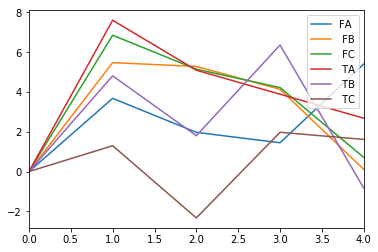

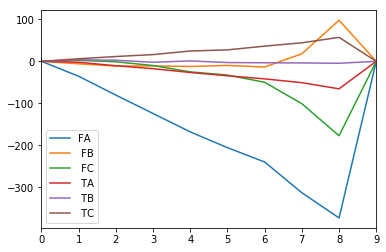

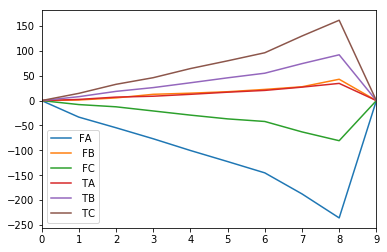

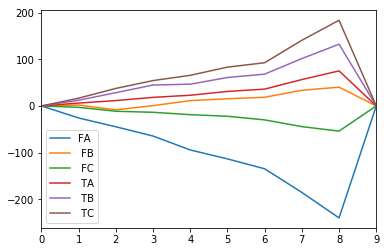

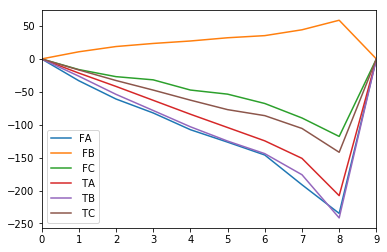

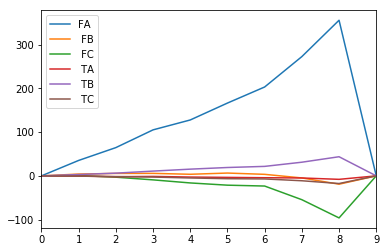

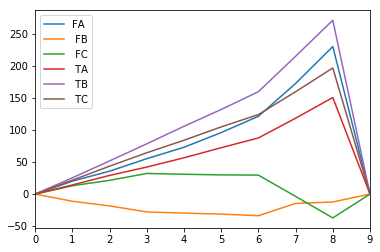

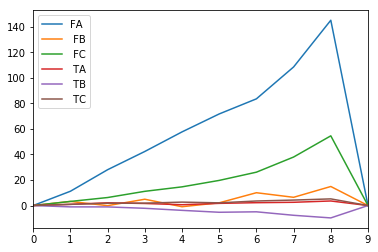

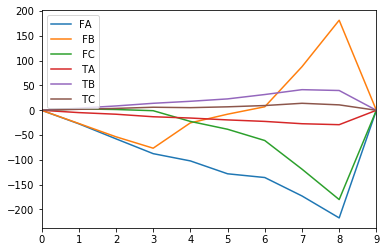

In [117]:
data_none_drop=drop_noisy(data_none)
data_none_single=my_mean(data_none_drop)
data_none_single.plot()
plt.show()

data_x1_drop=drop_noisy(data_x1)
data_x1_single=my_mean(data_x1_drop)
data_x1_single.plot()
plt.show()


data_xy_drop=drop_noisy(data_xy)
data_xy_single=my_mean(data_xy_drop)
data_xy_single.plot()
plt.show()

data_y1_drop=drop_noisy(data_y1)
data_y1_single=my_mean(data_y1_drop)
data_y1_single.plot()
plt.show()

data_y2_drop=drop_noisy(data_y2)
data_y2_single=my_mean(data_y2_drop)
data_y2_single.plot()
plt.show()

data_y3_drop=drop_noisy(data_y3)
data_y3_single=my_mean(data_y3_drop)
data_y3_single.plot()
plt.show()

data_y4_drop=drop_noisy(data_y4)
data_y4_single=my_mean(data_y4_drop)
data_y4_single.plot()
plt.show()

data_z1_drop=drop_noisy(data_z1)
data_z1_single=my_mean(data_z1_drop)
data_z1_single.plot()
plt.show()

data_z2_drop=drop_noisy(data_z2)
data_z2_single=my_mean(data_z2_drop)
data_z2_single.plot()
plt.show()

## 标签生成

### data_none的标签

In [59]:
label_none=[[0] * 6] * 5
label_none[0]=[0,0,0,0,0,0]
label_none[1]=[0,0,0,0,0,0]
label_none[2]=[0,0,0,0,0,0]
label_none[3]=[0,0,0,0,0,0]
label_none[4]=[0,0,0,0,0,0]
label_none=pd.DataFrame(label_none,dtype=np.float)
label_none

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


### data_x1的标签

In [60]:
label_x1=[[0] * 6] * 10
label_x1[0]=[0,0,0,0,0,0]
label_x1[1]=[-100,0,0,0,100*32,0]
label_x1[2]=[-200,0,0,0,200*32,0]
label_x1[3]=[-300,0,0,0,300*32,0]
label_x1[4]=[-400,0,0,0,400*32,0]
label_x1[5]=[-500,0,0,0,500*32,0]
label_x1[6]=[-600,0,0,0,600*32,0]
label_x1[7]=[-800,0,0,0,800*32,0]
label_x1[8]=[-1000,0,0,0,1000*32,0]
label_x1[9]=[0,0,0,0,0,0]
label_x1=pd.DataFrame(label_x1,dtype=np.float)
label_x1

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,-100.0,0.0,0.0,0.0,3200.0,0.0
2,-200.0,0.0,0.0,0.0,6400.0,0.0
3,-300.0,0.0,0.0,0.0,9600.0,0.0
4,-400.0,0.0,0.0,0.0,12800.0,0.0
5,-500.0,0.0,0.0,0.0,16000.0,0.0
6,-600.0,0.0,0.0,0.0,19200.0,0.0
7,-800.0,0.0,0.0,0.0,25600.0,0.0
8,-1000.0,0.0,0.0,0.0,32000.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0


### data_xy的标签

In [61]:
label_xy=[[0] * 6] * 10
label_xy[0]=[0,0,0,0,0,0]
label_xy[1]=[-100,0,0,0,0,100*45]
label_xy[2]=[-200,0,0,0,0,200*45]
label_xy[3]=[-300,0,0,0,0,300*45]
label_xy[4]=[-400,0,0,0,0,400*45]
label_xy[5]=[-500,0,0,0,0,500*45]
label_xy[6]=[-600,0,0,0,0,600*45]
label_xy[7]=[-800,0,0,0,0,800*45]
label_xy[8]=[-1000,0,0,0,0,1000*45]
label_xy[9]=[0,0,0,0,0,0]
label_xy=pd.DataFrame(label_xy,dtype=np.float)
label_xy

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,-100.0,0.0,0.0,0.0,0.0,4500.0
2,-200.0,0.0,0.0,0.0,0.0,9000.0
3,-300.0,0.0,0.0,0.0,0.0,13500.0
4,-400.0,0.0,0.0,0.0,0.0,18000.0
5,-500.0,0.0,0.0,0.0,0.0,22500.0
6,-600.0,0.0,0.0,0.0,0.0,27000.0
7,-800.0,0.0,0.0,0.0,0.0,36000.0
8,-1000.0,0.0,0.0,0.0,0.0,45000.0
9,0.0,0.0,0.0,0.0,0.0,0.0


### data_y1的标签

In [62]:
label_y1=[[0] * 6] * 10
label_y1[0]=[0,0,0,0,0,0]
label_y1[1]=[-100,0,0,0,0,100*90]
label_y1[2]=[-200,0,0,0,0,200*90]
label_y1[3]=[-300,0,0,0,0,300*90]
label_y1[4]=[-400,0,0,0,0,400*90]
label_y1[5]=[-500,0,0,0,0,500*90]
label_y1[6]=[-600,0,0,0,0,600*90]
label_y1[7]=[-800,0,0,0,0,800*90]
label_y1[8]=[-1000,0,0,0,0,1000*90]
label_y1[9]=[0,0,0,0,0,0]
label_y1=pd.DataFrame(label_y1,dtype=np.float)
label_y1

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,-100.0,0.0,0.0,0.0,0.0,9000.0
2,-200.0,0.0,0.0,0.0,0.0,18000.0
3,-300.0,0.0,0.0,0.0,0.0,27000.0
4,-400.0,0.0,0.0,0.0,0.0,36000.0
5,-500.0,0.0,0.0,0.0,0.0,45000.0
6,-600.0,0.0,0.0,0.0,0.0,54000.0
7,-800.0,0.0,0.0,0.0,0.0,72000.0
8,-1000.0,0.0,0.0,0.0,0.0,90000.0
9,0.0,0.0,0.0,0.0,0.0,0.0


### data_y2的标签

In [63]:
label_y2=[[0] * 6] * 10
label_y2[0]=[0,0,0,0,0,0]
label_y2[1]=[-100,0,0,0,0,-100*90]
label_y2[2]=[-200,0,0,0,0,-200*90]
label_y2[3]=[-300,0,0,0,0,-300*90]
label_y2[4]=[-400,0,0,0,0,-400*90]
label_y2[5]=[-500,0,0,0,0,-500*90]
label_y2[6]=[-600,0,0,0,0,-600*90]
label_y2[7]=[-800,0,0,0,0,-800*90]
label_y2[8]=[-1000,0,0,0,0,-1000*90]
label_y2[9]=[0,0,0,0,0,0]
label_y2=pd.DataFrame(label_y2,dtype=np.float)
label_y2

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,-100.0,0.0,0.0,0.0,0.0,-9000.0
2,-200.0,0.0,0.0,0.0,0.0,-18000.0
3,-300.0,0.0,0.0,0.0,0.0,-27000.0
4,-400.0,0.0,0.0,0.0,0.0,-36000.0
5,-500.0,0.0,0.0,0.0,0.0,-45000.0
6,-600.0,0.0,0.0,0.0,0.0,-54000.0
7,-800.0,0.0,0.0,0.0,0.0,-72000.0
8,-1000.0,0.0,0.0,0.0,0.0,-90000.0
9,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
label_y3=[[0,0,0,0,0,0],
          [0,100,0,100*32,0,0],
          [0,200,0,200*32,0,0],
          [0,300,0,300*32,0,0],
          [0,400,0,400*32,0,0],
          [0,500,0,500*32,0,0],
          [0,600,0,600*32,0,0],
          [0,800,0,800*32,0,0],
          [0,1000,0,1000*32,0,0],
          [0,0,0,0,0,0]]
label_y4=[[0,0,0,0,0,0],
          [0,100,0,0,0,100*90],
          [0,200,0,0,0,200*90],
          [0,300,0,0,0,300*90],
          [0,400,0,0,0,400*90],
          [0,500,0,0,0,500*90],
          [0,600,0,0,0,600*90],
          [0,800,0,0,0,800*90],
          [0,1000,0,0,0,1000*90],
          [0,0,0,0,0,0]]
label_z1=[[0,0,0,0,0,0],
          [0,0,-100,0,0,0],
          [0,0,-200,0,0,0],
          [0,0,-300,0,0,0],
          [0,0,-400,0,0,0],
          [0,0,-500,0,0,0],
          [0,0,-600,0,0,0],
          [0,0,-800,0,0,0],
          [0,0,-1000,0,0,0],
          [0,0,0,0,0,0]]
label_z2=[[0,0,0,0,0,0],
          [0,0,-100,0,100*90,0],
          [0,0,-200,0,200*90,0],
          [0,0,-300,0,300*90,0],
          [0,0,-400,0,400*90,0],
          [0,0,-500,0,500*90,0],
          [0,0,-600,0,600*90,0],
          [0,0,-800,0,800*90,0],
          [0,0,-1000,0,1000*90,0],
          [0,0,0,0,0,0]]
label_y3=pd.DataFrame(label_y3,dtype=np.float)
label_y4=pd.DataFrame(label_y4,dtype=np.float)
label_z1=pd.DataFrame(label_z1,dtype=np.float)
label_z2=pd.DataFrame(label_z2,dtype=np.float)

## 训练集、测试集划分

In [126]:
data_all= pd.concat([data_none_single, data_x1_single, data_xy_single, data_y1_single, data_y2_single, data_y3_single, data_y4_single, data_z1_single, data_z2_single], axis=0)
label_all=pd.concat([label_none, label_x1, label_xy, label_y1, label_y2, label_y3, label_y4, label_z1, label_z2], axis=0)
#x为数据集的feature熟悉，y为label.
x_train, x_test, y_train, y_test = train_test_split(data_all, label_all, test_size = 0.3)

# 神经网络搭建

In [80]:
import tensorflow as tf
import numpy as np

## 训练数据加载

## 定义节点准备接收数据

In [127]:
xs = tf.placeholder(tf.float32, [59, 6])
ys = tf.placeholder(tf.float32, [59, 6])

## 定义神经层：隐藏层和预测层

In [128]:
# 添加层
def add_layer(inputs, in_size, out_size, activation_function=None):
   # add one more layer and return the output of this layer
   Weights = tf.Variable(tf.random_normal([in_size, out_size]))
   biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
   Wx_plus_b = tf.matmul(inputs, Weights) + biases
   if activation_function is None:
       outputs = Wx_plus_b
   else:
       outputs = activation_function(Wx_plus_b)
   return outputs

In [129]:
# add hidden layer 输入值是 xs，在隐藏层有 10 个神经元   
l1 = add_layer(xs, 6, 10, activation_function=tf.nn.relu)
# add output layer 输入值是隐藏层 l1，在预测层输出 1 个结果
prediction = add_layer(l1, 10,6, activation_function=None)

## 定义 loss 表达式

In [130]:
# the error between prediciton and real data    
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                    reduction_indices=[1]))

## 选择 optimizer 使 loss 达到最小 

In [131]:
# 这一行定义了用什么方式去减少 loss，学习率是 0.1       
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

## 初始化

In [ ]:
# important step 对所有变量进行初始化
init = tf.global_variables_initializer()
sess = tf.Session()
# 上面定义的都没有运算，直到 sess.run 才会开始运算
sess.run(init)

## 训练

In [ ]:
# 迭代 1000 次学习，sess.run optimizer
for i in range(1000):
   # training train_step 和 loss 都是由 placeholder 定义的运算，所以这里要用 feed 传入参数
   sess.run(train_step, feed_dict={xs:data_x1_single, ys: label_x1})
   if i % 50 == 0:
       # to see the step improvement
       print(sess.run(loss, feed_dict={xs:data_x1_single, ys: label_x1}))